<a href="https://colab.research.google.com/github/nandasantosa/Machine-Learning-32513-UTS/blob/master/A2_LogisticRegression_SantosaFernanda13406537_WilleamFelicia13464906_A2_32513.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Link to Google Drive File
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd

In [0]:
#Support pandas dataframe as input
pip install category_encoders

In [0]:
#The shareable link
link = 'https://drive.google.com/open?id=1wgGUzBD8wA1LNMCg4gwhrTvnIH8yGTBQ' 

In [0]:
fluff, id = link.split('=')
print (id)

1wgGUzBD8wA1LNMCg4gwhrTvnIH8yGTBQ


In [0]:
#Reading the CSV File
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('weatherAUS.csv')  
df = pd.read_csv('weatherAUS.csv')
print(df)

              Date Location  MinTemp  ...  RainToday  RISK_MM  RainTomorrow
0       2008-12-01   Albury     13.4  ...         No      0.0            No
1       2008-12-02   Albury      7.4  ...         No      0.0            No
2       2008-12-03   Albury     12.9  ...         No      0.0            No
3       2008-12-04   Albury      9.2  ...         No      1.0            No
4       2008-12-05   Albury     17.5  ...         No      0.2            No
5       2008-12-06   Albury     14.6  ...         No      0.0            No
6       2008-12-07   Albury     14.3  ...         No      0.0            No
7       2008-12-08   Albury      7.7  ...         No      0.0            No
8       2008-12-09   Albury      9.7  ...         No      1.4           Yes
9       2008-12-10   Albury     13.1  ...        Yes      0.0            No
10      2008-12-11   Albury     13.4  ...         No      2.2           Yes
11      2008-12-12   Albury     15.9  ...        Yes     15.6           Yes
12      2008

In [0]:
#List Label/Column Names
list(df.columns) 

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [0]:
#Dataset Dimension
df.shape

(142193, 24)

In [0]:
##Information of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

The dataset contains categorical and numerical variables.<br>
Categorical = Object<br>
Numerical = Float 64

In [0]:
#Number of location variables
print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [0]:
#Unique labels from Location variable
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [0]:
#Unique labels from WidGustDir variable
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [0]:
#Count values on the report
df.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [0]:
#Finding the missing values
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [0]:
#Categorising based on Location
location = df.groupby('Location')
location.first()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,2008-07-01,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,W,13.0,15.0,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,Yes,0.8,No
Albany,2008-12-01,13.3,18.5,0.0,3.8,8.9,NaN,NaN,NNW,SW,4.0,17.0,82.0,63.0,1017.9,1015.2,7.0,5.0,15.2,17.9,No,0.0,No
Albury,2008-12-01,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No,0.0,No
AliceSprings,2008-12-01,19.6,37.6,0.0,11.2,9.8,WNW,87.0,NNE,NE,20.0,11.0,17.0,16.0,1010.5,1005.8,0.0,3.0,30.4,37.2,No,1.2,Yes
BadgerysCreek,2009-01-01,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,SE,11.0,24.0,67.0,54.0,1005.6,1013.5,NaN,NaN,21.0,22.2,No,0.0,No
Ballarat,2008-12-01,5.8,17.6,3.2,NaN,NaN,W,52.0,W,WNW,26.0,30.0,71.0,37.0,1008.2,1007.5,6.0,8.0,10.4,15.7,Yes,0.4,No
Bendigo,2008-12-01,9.1,21.7,0.0,7.4,NaN,W,44.0,WNW,WSW,20.0,20.0,47.0,23.0,1009.1,1007.5,2.0,5.0,14.0,19.4,No,0.0,No
Brisbane,2008-07-01,10.3,25.2,0.0,1.4,9.5,WNW,26.0,SSW,W,6.0,15.0,81.0,37.0,1019.6,1014.8,0.0,1.0,14.9,24.6,No,0.0,No
Cairns,2008-12-01,25.2,32.3,0.4,4.0,6.4,NE,31.0,E,ENE,7.0,13.0,62.0,66.0,1011.3,1008.1,5.0,7.0,31.2,30.7,No,8.4,Yes


In [0]:
#Frequencey Distribution on Location variable
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [0]:
#Categorising based on Location & Date
Location_group = df.groupby(['Location', 'Date']) 
Location_group.first() 

MinTemp  MaxTemp  Rainfall  ...  RainToday  RISK_MM RainTomorrow
Location Date                                    ...                                 
Adelaide 2008-07-01      8.8     15.7       5.0  ...        Yes      0.8           No
         2008-07-02     12.7     15.8       0.8  ...         No      0.0           No
         2008-07-03      6.2     15.1       0.0  ...         No      0.0           No
         2008-07-04      5.3     15.9       0.0  ...         No      0.0           No
         2008-07-06     11.3     15.7       NaN  ...        NaN     16.2          Yes
         2008-07-07      7.6     11.2      16.2  ...        Yes     17.0          Yes
         2008-07-08      5.3     13.5      17.0  ...        Yes      1.8          Yes
         2008-07-09      8.4     14.3       1.8  ...        Yes      9.0          Yes
         2008-07-10      9.5     13.1       9.0  ...        Yes      0.2           No
         2008-07-13      9.4     16.8       NaN  ...        NaN      3.8          Yes
         2008-07-14     10.0     15.4       3.8  ...        Yes      4.0          Yes
         2008-07-15     11.1     14.7       4.0  ...        Yes      0.2           No
         2008-07-16      6.3     14.1       0.2  ...         No      0.2           No
         2008-07-17      9.8     14.7       0.2  ...         No      1.4          Yes
         2008-07-20      9.9     12.0       NaN  ...        NaN      6.8          Yes
         2008-07-21      6.5     14.2       6.8  ...        Yes      0.0           No
         2008-07-22      6.0     13.8       0.0  ...         No      0.0           No
         2008-07-23      5.4     14.2       0.0  ...         No      0.0           No
         2008-07-24      2.6     14.9       0.0  ...         No      0.0           No
         2008-07-26      7.1     13.8       NaN  ...        NaN      1.6          Yes
         2008-07-27      2.8     11.8       1.6  ...        Yes      0.0           No
         2008-07-28      0.7     14.0       0.0  ...         No      0.0           No
         2008-07-29      4.9     13.0       0.0  ...         No      3.4          Yes
         2008-07-30      8.5     16.1       3.4  ...        Yes      0.8           No
         2008-07-31      7.6     19.3       0.8  ...         No      1.8          Yes
         2008-08-03      7.2     18.1       NaN  ...        NaN      8.2          Yes
         2008-08-04      9.0     13.8       8.2  ...        Yes     16.2          Yes
         2008-08-05      6.4     15.0      16.2  ...        Yes      1.2          Yes
         2008-08-06      7.4     11.9       1.2  ...        Yes     11.2          Yes
         2008-08-07      5.9     13.2      11.2  ...        Yes      0.8           No
...                      ...      ...       ...  ...        ...      ...          ...
Woomera  2017-05-26      8.4     21.8       0.0  ...         No      0.0           No
         2017-05-27      9.4     23.0       0.0  ...         No      0.0           No
         2017-05-28      7.7     17.9       0.0  ...         No      0.0           No
         2017-05-29      7.5     18.9       0.0  ...         No      0.0           No
         2017-05-30     10.5     18.1       0.0  ...         No      0.0           No
         2017-05-31      5.7     15.6       0.0  ...         No      0.0           No
         2017-06-01      3.4     16.6       0.0  ...         No      0.0           No
         2017-06-02      2.7     17.8       0.0  ...         No      0.0           No
         2017-06-03      2.3     18.9       0.0  ...         No      0.0           No
         2017-06-04      2.1     18.6       0.0  ...         No      0.0           No
         2017-06-05      2.9     19.3       0.0  ...         No      0.0           No
         2017-06-06      6.9     19.3       0.0  ...         No      0.0           No
         2017-06-07      4.0     17.2       0.0  ...         No      0.0           No
         2017-06-08      3.6     18.0       0.0  ...         No  

In [0]:
#Check for missing values in RainTomorrow target variable
df['RainTomorrow'].isnull().sum()

0

There is no missing value in the RainTomorrow target variable.

In [0]:
#Number of Unique Values in RainTomorrow
df['RainTomorrow'].nunique()

2

There are 2 unique values in RainTomorrow variable

In [0]:
#Identify Unique Values in RainTomorrow
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

2 Unique Values: No, Yes.

In [0]:
#Frequency of unique values distribution in RainTomorrow
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

No has 110315 entries <br>
Yes has 31877 entries

In [0]:
#Percentage of unique values distribution in RainTomorrow
df['RainTomorrow'].value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

No appears 77.5819% while Yes appears 22.4181% in RainTomorrow variable

## Data Exploration

In [0]:
#Import mathematical functions and data exploration
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

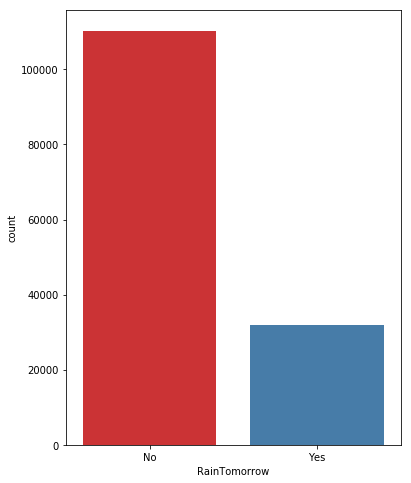

In [0]:
#Data visualisation of frequency distribution of RainTomorrow variable
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

Since Date attribute is a datetime datatype, we changed it to Object data and put it to three variables; Date, Month and Year. 

In [0]:
df['Date'].dtypes

dtype('O')

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [0]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [0]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [0]:
#Updated Information of datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-n

In [0]:
#Remove Date variable
df.drop('Date', axis=1, inplace = True)

In [0]:
#Show updated column names
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [0]:
#Finding categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [0]:
#Check the categorical variables
df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [0]:
# Check missing values from the categorical variables
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


Categorical Variables: Location, WidGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow <br>
Binary Categorical Variables :  RainToday and RainTomorrow. RainTomorrow is the target variable

In [0]:
#Remove Risk_MM variable to create unbiased model. 
df.drop(['RISK_MM'], axis=1, inplace=True)

In [0]:
#Finding the number of unique labels in WindGustDir variable
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [0]:
#Check unique labels in WindGustDir variable
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [0]:
#Frequency Distribution in WidGustDir variable
df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

Hot Encoding process is required in order to convert categorical variables to a form which Machine Learning algorithm can generate better prediction.
Dummy variable is created to indicate the missing data

In [0]:
# Observations summary over the boolean varibles over rows for each category
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,nan
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

We can see that there are 9330 missing values in WindGustDir variable.

In [0]:
#Finding the number of unique labels in WindDir9am variable
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [0]:
#Check unique labels in WindDir9am variable
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [0]:
#Frequency Distribution in WindDir9am variable
df.WindDir9am.value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [0]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,nan
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

We can see that there are 10013 missing values in WindDir9am variable.

In [0]:
#Finding the number of unique labels in WindDir3pm variable
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [0]:
#Check unique labels in WindDir3pm variable
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [0]:
#Frequency Distribution in WidDir3pm variable
df.WindDir3pm.value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [0]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,nan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
dtype: int64

We can see that there are 3778 missing values in WindDir3pm variable.

In [0]:
#Finding numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [0]:
#Check the numerical variables
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [0]:
#Check the numerical variables
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [0]:
#Finding the missing values in numerical variables
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [0]:
#Finding outliers in numerical values and summary statistics in numerical variables
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  ...      Year     Month       Day
count  141556.0  141871.0  140787.0  ...  142193.0  142193.0  142193.0
mean       12.0      23.0       2.0  ...    2013.0       6.0      16.0
std         6.0       7.0       8.0  ...       3.0       3.0       9.0
min        -8.0      -5.0       0.0  ...    2007.0       1.0       1.0
25%         8.0      18.0       0.0  ...    2011.0       3.0       8.0
50%        12.0      23.0       0.0  ...    2013.0       6.0      16.0
75%        17.0      28.0       1.0  ...    2015.0       9.0      23.0
max        34.0      48.0     371.0  ...    2017.0      12.0      31.0

[8 rows x 19 columns] 2


Text(0, 0.5, 'WindSpeed3pm')

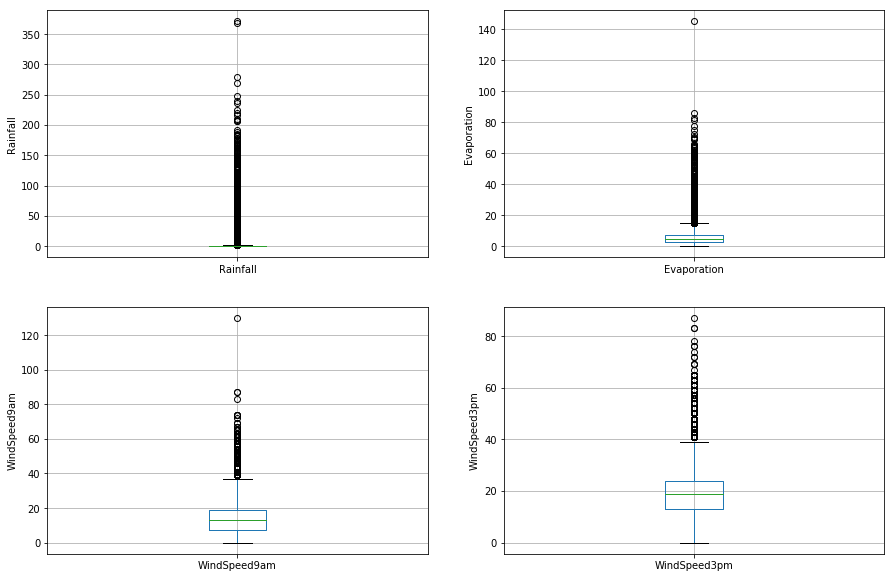

In [0]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm') 

###Distribution of variables

Text(0, 0.5, 'RainTomorrow')

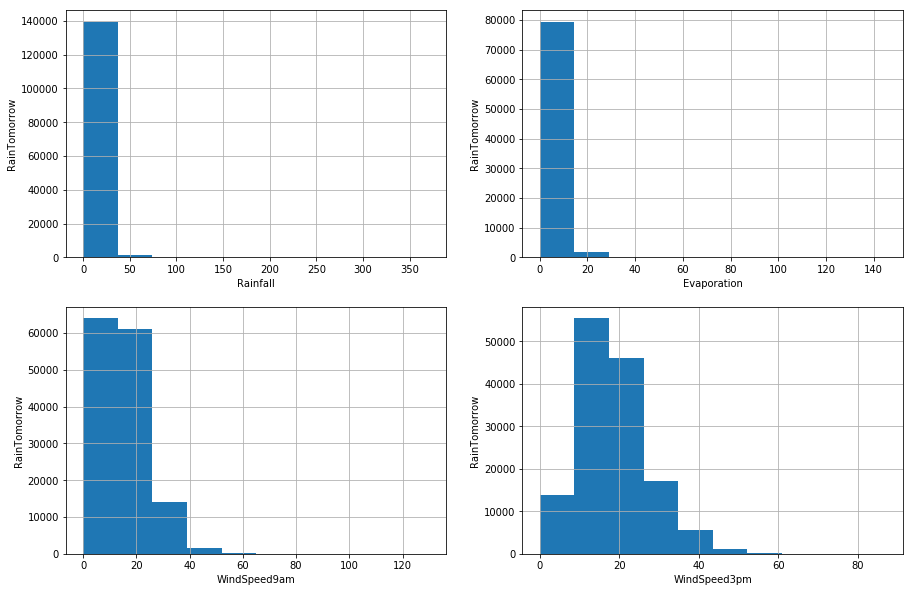

In [0]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [0]:
#Finding outliers in Rainfall variable
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [0]:
#Finding outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [0]:
#Finding outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [0]:
#Finding outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


### Data exploration is used to discover patterns and relationships between variables in the dataset; Heat map and Pair plot.

In [0]:
correlation = df.corr()

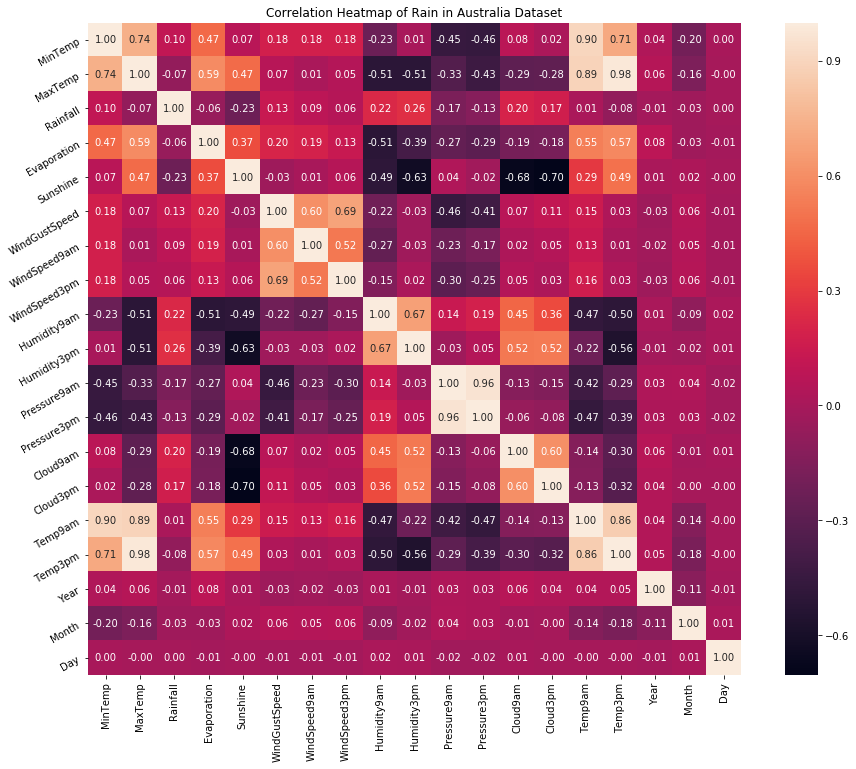

In [0]:
#Heat map
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Highly positive correlated variables: 
- `MinTemp` and `MaxTemp` 
- `MinTemp` and `Temp9am` 
- `MinTemp` and `Temp3pm`
- `MaxTemp` and `Temp9am` 
- `MaxTemp` and `Temp3pm` 
- `WindGustSpeed` and `WindSpeed3pm` 
- `Pressure9am` and `Pressure3pm` 
- `Temp9am` and `Temp3pm`


### Pair Plot - Use variables that are highly positively correlated.

In [0]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


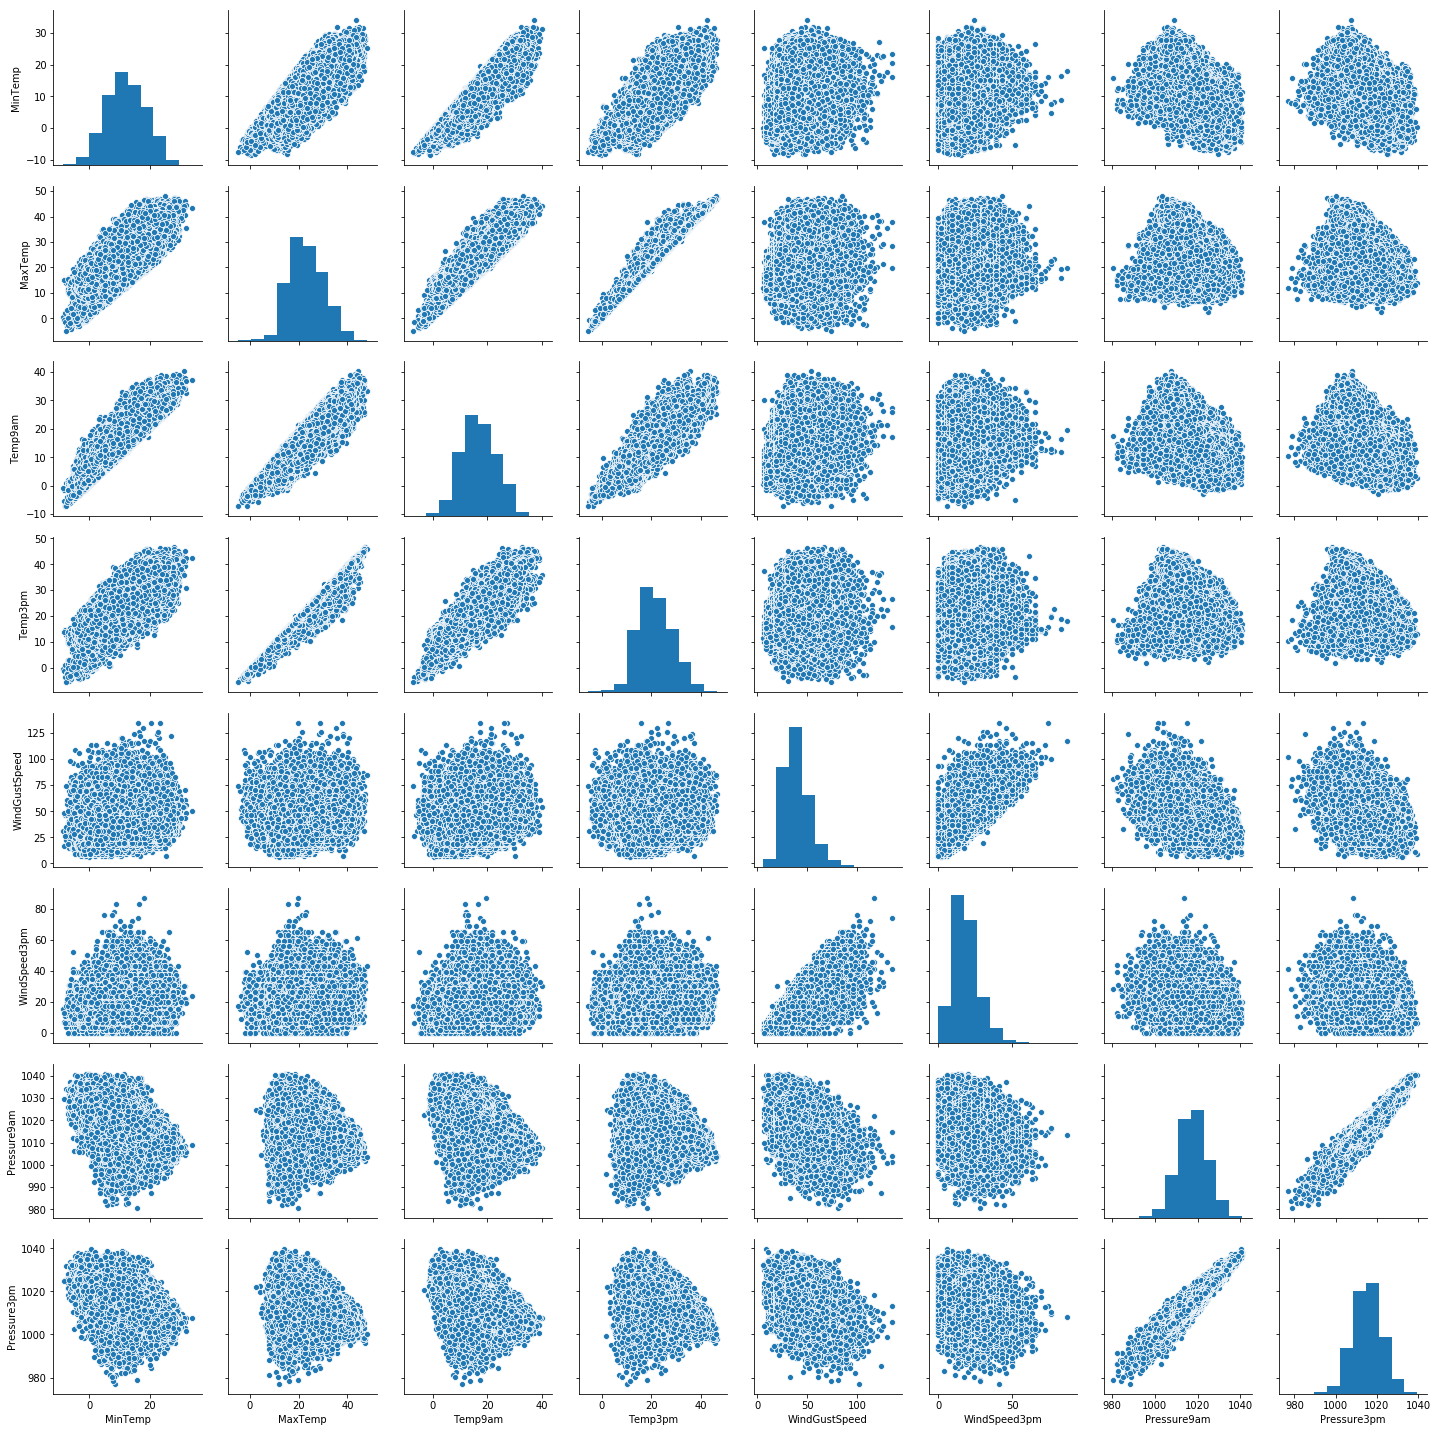

In [0]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

## Target Variable

In [0]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

## Split data into training and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [0]:
# check data types in X_train
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [0]:
#Categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [0]:
#Numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [0]:
#Finding missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [0]:
#Finding missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [0]:
#The percentage of missing values in numerical variables in training set
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


In [0]:
#Imputation of missing values in X_train and X_test with median
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
#Checking missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [0]:
#Checking missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [0]:
#Finding the percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [0]:
#Finding categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [0]:
#Imputation of missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
#Checking missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [0]:
#Checking missing values in X_train
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [0]:
#Checking missing values in X_test
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [0]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [0]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [0]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [0]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [0]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [0]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113754 entries, 110803 to 43567
Data columns (total 24 columns):
Location         113754 non-null object
MinTemp          113754 non-null float64
MaxTemp          113754 non-null float64
Rainfall         113754 non-null float64
Evaporation      113754 non-null float64
Sunshine         113754 non-null float64
WindGustDir      113754 non-null object
WindGustSpeed    113754 non-null float64
WindDir9am       113754 non-null object
WindDir3pm       113754 non-null object
WindSpeed9am     113754 non-null float64
WindSpeed3pm     113754 non-null float64
Humidity9am      113754 non-null float64
Humidity3pm      113754 non-null float64
Pressure9am      113754 non-null float64
Pressure3pm      113754 non-null float64
Cloud9am         113754 non-null float64
Cloud3pm         113754 non-null float64
Temp9am          113754 non-null float64
Temp3pm          113754 non-null float64
RainToday        113754 non-null object
Year             113754 non-n

In [0]:
#Encode RainToday variable
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113754 entries, 110803 to 43567
Data columns (total 25 columns):
Location         113754 non-null object
MinTemp          113754 non-null float64
MaxTemp          113754 non-null float64
Rainfall         113754 non-null float64
Evaporation      113754 non-null float64
Sunshine         113754 non-null float64
WindGustDir      113754 non-null object
WindGustSpeed    113754 non-null float64
WindDir9am       113754 non-null object
WindDir3pm       113754 non-null object
WindSpeed9am     113754 non-null float64
WindSpeed3pm     113754 non-null float64
Humidity9am      113754 non-null float64
Humidity3pm      113754 non-null float64
Pressure9am      113754 non-null float64
Pressure3pm      113754 non-null float64
Cloud9am         113754 non-null float64
Cloud3pm         113754 non-null float64
Temp9am          113754 non-null float64
Temp3pm          113754 non-null float64
RainToday_0      113754 non-null int64
RainToday_1      113754 non-nu

Adding two additional variables `RainToday_0` and `RainToday_1` are created from the `RainToday` variable.

In [0]:
#Creating the `X_train` training set.
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [0]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
110803,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,1013.9,1013.4,5.0,5.0,18.8,20.4,2014,4,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
87289,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,1016.9,1013.1,7.0,5.0,26.4,27.5,2015,11,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
134949,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,1018.1,1013.6,1.0,1.0,28.5,35.0,2014,10,19,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
85553,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,1014.1,1010.8,2.0,3.0,27.3,29.4,2010,10,30,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16110,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,1017.6,1015.2,5.0,8.0,22.2,27.0,2012,11,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [0]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,2012,10,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
57576,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,2011,5,24,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
124071,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,1014.4,1016.1,5.0,5.0,12.3,13.0,2009,8,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,2009,3,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
133468,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,2010,7,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419,0.221012,0.778988,0.021968,0.021028,0.021151,0.021432,0.020711,0.021546,0.021476,0.022426,0.021107,0.024017,0.020676,0.020861,0.021133,0.022733,0.020984,0.022645,0.010910,0.021204,0.017037,...,0.063127,0.065501,0.062767,0.060393,0.062037,0.134518,0.056807,0.062257,0.063655,0.054539,0.052745,0.150272,0.053088,0.055374,0.055145,0.060279,0.059804,0.064376,0.062679,0.052543,0.058477,0.058169,0.050636,0.048218,0.058565,0.054671,0.05904,0.060771,0.057589,0.045141,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821,0.414930,0.414930,0.146581,0.143478,0.143888,0.144821,0.142417,0.145198,0.144966,0.148064,0.143742,0.153102,0.142299,0.142919,0.143829,0.149053,0.143331,0.148771,0.103878,0.144063,0.129409,...,0.243193,0.247409,0.242545,0.238215,0.241224,0.341210,0.231474,0.241623,0.244138,0.227079,0.223526,0.357339,0.224210,0.228710,0.228265,0.238004,0.237125,0.245422,0.242386,0.223121,0.234644,0.234064,0.219253,0.214228,0.234810,0.227337,0.23570,0.238912,0.232966,0.207615,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.00000

In [0]:
cols = X_train.columns

Feature scaling is used to acquire same scale factor

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [0]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [0]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,0.613895,0.610258,0.516867,0.587949,0.510444,0.519936,0.575973,0.491275,0.490347,0.221012,0.778988,0.021968,0.021028,0.021151,0.021432,0.020711,0.021546,0.021476,0.022426,0.021107,0.024017,0.020676,0.020861,0.021133,0.022733,0.020984,0.022645,0.010910,0.021204,0.017037,...,0.063127,0.065501,0.062767,0.060393,0.062037,0.134518,0.056807,0.062257,0.063655,0.054539,0.052745,0.150272,0.053088,0.055374,0.055145,0.060279,0.059804,0.064376,0.062679,0.052543,0.058477,0.058169,0.050636,0.048218,0.058565,0.054671,0.05904,0.060771,0.057589,0.045141,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,0.111383,0.106803,0.254747,0.264731,0.136366,0.131586,0.254042,0.311618,0.293227,0.414930,0.414930,0.146581,0.143478,0.143888,0.144821,0.142417,0.145198,0.144966,0.148064,0.143742,0.153102,0.142299,0.142919,0.143829,0.149053,0.143331,0.148771,0.103878,0.144063,0.129409,...,0.243193,0.247409,0.242545,0.238215,0.241224,0.341210,0.231474,0.241623,0.244138,0.227079,0.223526,0.357339,0.224210,0.228710,0.228265,0.238004,0.237125,0.245422,0.242386,0.223121,0.234644,0.234064,0.219253,0.214228,0.234810,0.227337,0.23570,0.238912,0.232966,0.207615,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,0.545455,0.542400,0.333333,0.500000,0.411392,0.424184,0.400000,0.181818,0.2333

# Logistic Regression classifier






In [0]:
#logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

predict_proba method gives the probabilities for the target variable(0 and 1); in array form. <br>0 is probability of no rain and 1 for probability of rain.

In [0]:
#probability of getting output as 0 - no rain
logreg.predict_proba(X_test)[:,0]

array([0.91382428, 0.83565645, 0.82033915, ..., 0.97674285, 0.79855098,
       0.30734161])

In [0]:
#probability of getting output as 1 - rain
logreg.predict_proba(X_test)[:,1]

array([0.08617572, 0.16434355, 0.17966085, ..., 0.02325715, 0.20144902,
       0.69265839])

### Check accuracy score

In [0]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8502


y_test is the true class labels and y_pred_test is the predicted class labels in the test-set.

In [0]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [0]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8476


### Check for overfitting and underfitting

In [0]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8476
Test set score: 0.8502


## Confusion matrix
It demonstrates the model performance and the types of errors; True positives(TP), True negatives(TN), False Positives(FP), and False Negatives(FN).

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20892  1175]
 [ 3086  3286]]

True Positives(TP) =  20892

True Negatives(TN) =  3286

False Positives(FP) =  1175

False Negatives(FN) =  3086


The confusion matrix shows 20892 + 3286 = 24178 correct predictions and 3086 + 1175 = 4261 incorrect predictions.

True Positives (Actual Positive:1 and Predict Positive:1) - 20892 <br>
True Negatives (Actual Negative:0 and Predict Negative:0) - 3286 <br>
False Positives (Actual Negative:0 but Predict Positive:1) - 1175 (Type I error) <br>
False Negatives (Actual Positive:1 but Predict Negative:0) - 3087 (Type II error) <br>

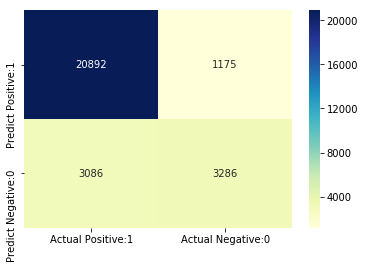

In [0]:
#Data visualisation of confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Metrics: precision, recall, f1 and support scores.






In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



### Classification Accuracy

In [0]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [0]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8502


### Classification Error

In [0]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1498


Precision demonstrates the correct predicted positive outcomes out of all the predicted positive outcomes. It defines the the ratio of TP to (TP + FP)



In [0]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9468


Recall demonstrates the correctly predicted positive outcomes out of all the actual positive outcomes. It defines the ratio of TP to (TP + FN).

In [0]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8713


True Positive Rate

In [0]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8713


False Positive Rate

In [0]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2634



The logistic regression model accuracy score is 0.8502. The model have done great job in predicted . The model demonstrates small number of prediciting there will be rain tomorrow compare to the majority of the observation which predict that it will not rain tomorrow.